In [1]:
from src.RT_prediction.RT_prediction import *
import pickle as pkl

In [2]:
RT_pred = RT_predictor(n_jobs=20)

In [3]:
filename = "../data/molecular_properties.csv"
data = pd.read_csv(filename)

In [4]:
goodCols = RT_pred.get_good_desc(data)
        
print(len(goodCols))        

Unnamed: 0 non-real valued descriptor
Name non-real valued descriptor
121


In [5]:
X = data.loc[:,goodCols].to_numpy()
y = data["RT"].values

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state = 20)

In [7]:
# if __name__ == "__main__":
#     result = {}
#     num_trees_to_try = [1,10,100,500]
#     msToTry = [int(x) for x in np.linspace(1,len(X_train[0]),10)]
#     mds = [1,10,100,200]
#     
#     for nest in num_trees_to_try:
#         for m in msToTry:
#             for md in mds:
#                 result[(nest,m,md)] = RT_pred.crossValPrediction(X_train,y_train,nest,m,md)

(1, 121, 100)


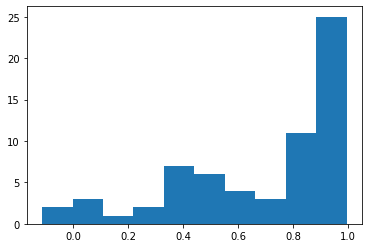

In [17]:
#pkl.dump(result,open("hyperparam_results.pkl","wb"))
result = pkl.load(open("hyperparam_results.pkl","rb"))

bestParams = list(result.keys())
bestParams.sort(key=lambda x: result[x],reverse=True)
print(bestParams[0])
bestParams = bestParams[0]
nBest = bestParams[0]
mBest = bestParams[1]
bestDepth = bestParams[2]
plt.hist(result.values())
nBest,mBest,bestDepth = (1,121,100)

In [18]:
y_pred_test = RT_pred.fit_predict(X_train,y_train,X_test,nBest,mBest,bestDepth)

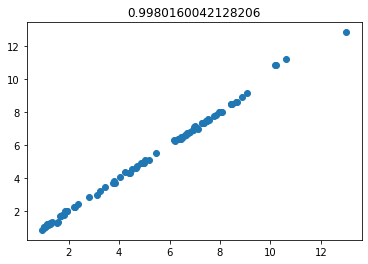

In [19]:
plt.scatter(y_test,y_pred_test)
plt.title(str(r2_score(y_test, y_pred_test)))
bestR2 = r2_score(y_test, y_pred_test)

In [15]:
r2s = []
numIters = 100
for x in range(numIters):
    yTemp = shuffle(y_train)
    y_pred = RT_pred.fit_predict(X_train,yTemp,X_test,nBest,mBest,bestDepth)
    r2s.append(r2_score(y_test,y_pred))
    

c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Frequency')

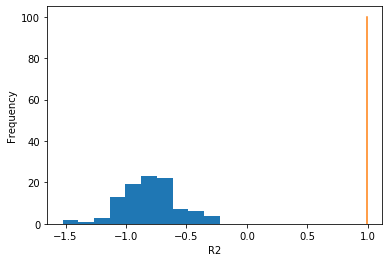

In [16]:
plt.hist(r2s,normed=False)
plt.plot([bestR2,bestR2],[0,100])
plt.xlabel("R2")
plt.ylabel("Frequency")